In [1]:
!pip install yfinance

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e4f39a0a6a1021ea3e8bcf2f0d113fbfcaaebb0fc2c8b77f04e83a6c9dc0b3cd
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=210ada2c0d35fd09f215fe2260354258dc95a3ce81e2918fea780bcd7af92f34
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Succ

In [2]:
import yfinance as yt
import pandas as pd

In [3]:
tesla=yt.Ticker("TSLA")

In [21]:
tesla_data=tesla.history(period="max")

In [115]:
tesla_data.reset_index(inplace=True)

In [116]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [24]:
tesla_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-26,741.000000,749.299988,732.609985,738.200012,31038500,0,0.0
2021-04-27,717.960022,724.000000,703.349976,704.739990,29437000,0,0.0
2021-04-28,696.409973,708.500000,693.599976,694.400024,22271000,0,0.0
2021-04-29,699.510010,702.250000,668.500000,677.000000,28845400,0,0.0
2021-04-30,667.590027,715.469971,666.140015,709.440002,40686400,0,0.0


In [83]:
from bs4 import BeautifulSoup as bs 

In [104]:
import requests
url="https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1612137600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"

In [128]:
html_data=requests.get(url).text


In [107]:
soup=bs(html_data,"html5lib")
soup.title

<title>Tesla, Inc. (TSLA) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [108]:
tesla_revenue=pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

In [109]:
for row in soup.find("tbody").findAll("tr"):
    col=row.findAll("td")
    if(col!=[]):
        date=col[0].text
        Open=col[1].text
        high=col[2].text
        low=col[3].text
        close=col[4].text
        adj=col[5].text
        volume=col[6].text
        tesla_revenue=tesla_revenue.append({"Date":date,"Open":Open,"High":high,"Low":low,"Close":close,"Adj Close":adj,"Volume":volume},ignore_index=True)

In [112]:
tesla_revenue.reset_index(inplace=True)

In [114]:
tesla_revenue.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
95,95,"Sep 14, 2020",380.95,420.00,373.30,419.62,419.62,"83,020,600"
96,96,"Sep 11, 2020",381.94,382.50,360.50,372.72,372.72,"60,717,500"
97,97,"Sep 10, 2020",386.21,398.99,360.56,371.34,371.34,"84,930,600"
98,98,"Sep 09, 2020",356.60,369.00,341.51,366.28,366.28,"79,465,800"
99,99,"Sep 08, 2020",356.00,368.74,329.88,330.21,330.21,"115,465,700"


In [118]:
gme=yt.Ticker("GME")

In [119]:
gme_data=gme.history(period="max")

In [120]:
gme_data.reset_index(inplace=True)

In [121]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [122]:
url2="https://finance.yahoo.com/quote/GME/history?period1=1013558400&period2=1619827200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
html=requests.get(url2).text

In [123]:
soup=bs(html,"html5lib")

In [125]:
gme_revenue=pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])
for r in soup.find("tbody").findAll("tr"):
    col=r.findAll("td")
    if(col!=[]):
        date=col[0].text
        Open=col[1].text
        high=col[2].text
        low=col[3].text
        close=col[4].text
        adj=col[5].text
        volume=col[6].text
        gme_revenue=gme_revenue.append({"Date":date,"Open":Open,"High":high,"Low":low,"Close":close,"Adj Close":adj,"Volume":volume},ignore_index=True)
        
        

In [127]:
gme_revenue.reset_index(inplace=True)
gme_revenue.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
95,95,"Dec 11, 2020",13.91,14.00,13.02,13.31,13.31,"7,496,900"
96,96,"Dec 10, 2020",13.12,14.41,13.05,14.12,14.12,"7,558,900"
97,97,"Dec 09, 2020",13.92,14.73,13.23,13.66,13.66,"24,357,900"
98,98,"Dec 08, 2020",16.37,17.21,15.93,16.94,16.94,"16,120,200"
99,99,"Dec 07, 2020",17.00,17.50,16.22,16.35,16.35,"7,386,300"


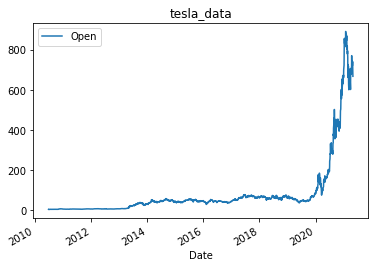

In [141]:
make_graph=tesla_data.plot(x="Date",y="Open",title="tesla_data")

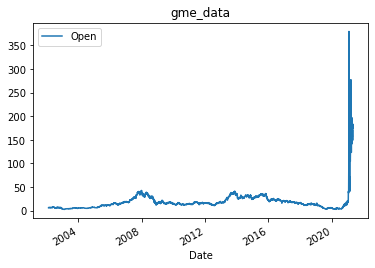

In [144]:
make_graph=gme_data.plot(x="Date",y="Open",title="gme_data")